https://github.com/UB-Mannheim/tesseract/wiki

PSM

0    Orientation and script detection (OSD) only.

1    Automatic page segmentation with OSD.

2    Automatic page segmentation, but no OSD, or OCR. (not implemented)

3    Fully automatic page segmentation, but no OSD. (Default)

4    Assume a single column of text of variable sizes.

5    Assume a single uniform block of vertically aligned text.

6    Assume a single uniform block of text.

7    Treat the image as a single text line.

8    Treat the image as a single word.

9    Treat the image as a single word in a circle.

10    Treat the image as a single character.

11    Sparse text. Find as much text as possible in no particular order.

12    Sparse text with OSD.

13    Raw line. Treat the image as a single text line,
      bypassing hacks that are Tesseract-specific.

LIBS

In [1]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'text-recognize/tesseract/tesseract.exe'

import numpy as np
import cv2 
import matplotlib.pyplot as plt

import re

IMAGEM

In [2]:
img = cv2.imread('text-recognize/Imagens/Aula1-teste.png')

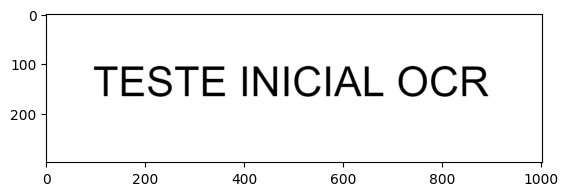

In [3]:
plt.imshow(img)

In [4]:
texto = pytesseract.image_to_string(img)
texto

'TESTE INICIAL OCR\n'

IMAGEM COLORIDA

In [5]:
def plot_extract(img, lang='por'):    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(rgb_img)
    texto = pytesseract.image_to_string(gray_img, lang=lang)
    print(texto)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



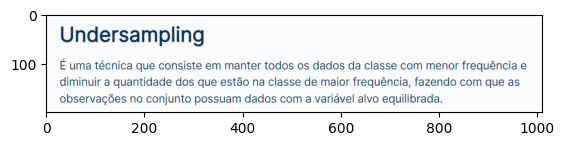

In [6]:
ext_img = cv2.imread('text-recognize/Imagens/Aula2-undersampling.png')
plot_extract(ext_img)

OUTPUT

G

Tesseract OCR



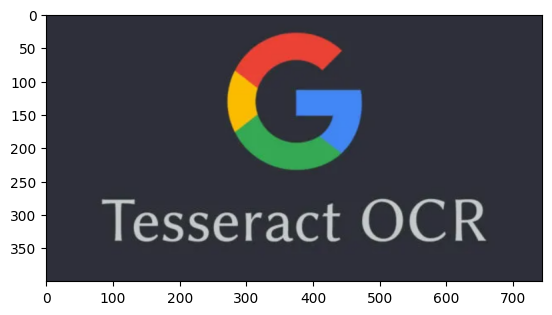

In [7]:
output_img = cv2.imread('text-recognize/Imagens/Aula1-ocr.png')
plot_extract(output_img)


In [8]:
result = pytesseract.image_to_data(
    cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB),
    lang='por',
    output_type=pytesseract.Output().DICT
    )

result

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0, 272, 272, 272, 272, 84, 84, 84, 84, 474],
 'top': [0, 28, 28, 28, 28, 277, 277, 277, 278, 277],
 'width': [744, 202, 202, 202, 202, 576, 576, 576, 357, 186],
 'height': [400, 205, 205, 205, 205, 64, 64, 64, 63, 64],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  '92.869949',
  '-1',
  '-1',
  '-1',
  '90.681732',
  '95.405243'],
 'text': ['', '', '', '', 'G', '', '', '', 'Tesseract', 'OCR']}

In [20]:
def caixa_texto(i, resultado, img, cor = (255, 100, 0), show_txt=True):
    x = resultado['left'][i]
    y = resultado['top'][i]
    w = resultado['width'][i]
    h = resultado['height'][i]

    cv2.rectangle(img, (x, y), (x+w, y+h), cor, 2)

    if show_txt:
        cv2.putText(img, resultado['text'][i], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, cor, 2)

    return x, y, img

In [10]:
min_conf = 40 

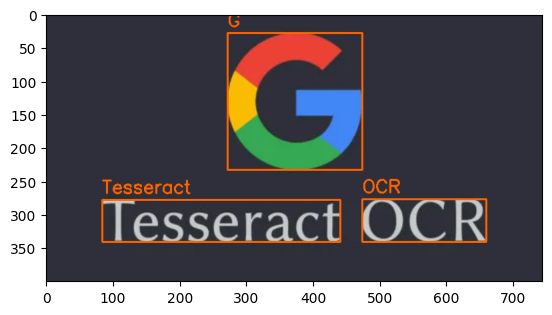

In [11]:
img_copia = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
for i in range(len(result['text'])):
  confianca = float(result['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(i, result, img_copia)

plt.imshow(img_copia)

REGEX

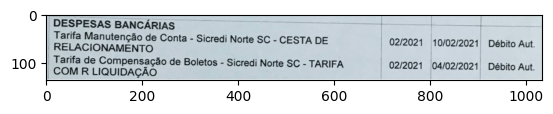

In [12]:
regex_img = cv2.imread('text-recognize/Imagens/Aula4-tabela_teste.png')
rgb_regex_img = cv2.cvtColor(regex_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_regex_img)

In [13]:
regex_img_data = pytesseract.image_to_data(cv2.cvtColor(regex_img, cv2.COLOR_BGR2GRAY), 
                                               lang='por', 
                                               output_type=pytesseract.Output().DICT
                                               )
regex_img_data

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [14]:
print(regex_img_data['text'])

['', '', '', '', 'DESPESAS', 'BANCÁRIAS', '', '', '', 'Tarifa', 'Manutenção', 'de', 'Conta', '-', 'Sicredi', 'Norte', 'SC', '-', 'CESTA', 'DE', '02/2021', '10/02/2021', 'Débito', 'Aut.', '', 'RELACIONAMENTO', '', 'Tarifa', 'de', 'Compensação', 'de', 'Boletos', '-', 'Sicredi', 'Norte', 'SC', '-', 'TARIFA', '02/2021', '04/02/2021', 'Débito', 'Aut.', '', '', '', 'COM', 'R', 'LIQUIDAÇÃO']


In [15]:
padrao_data = re.compile('^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$')

10/02/2021
04/02/2021


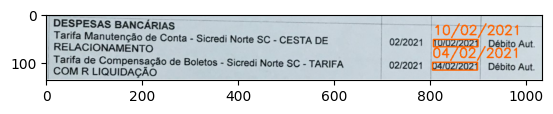

In [16]:
img_copia = rgb_regex_img.copy()
min_conf = 1

for i in range(len(regex_img_data['text'])):
  confianca = float(regex_img_data['conf'][i])
  if confianca > min_conf:
    if padrao_data.match(regex_img_data['text'][i]):
      print(regex_img_data['text'][i])
      x, y, img = caixa_texto(i, regex_img_data, img_copia)

plt.imshow(img_copia)

IMAGENS NATURAIS

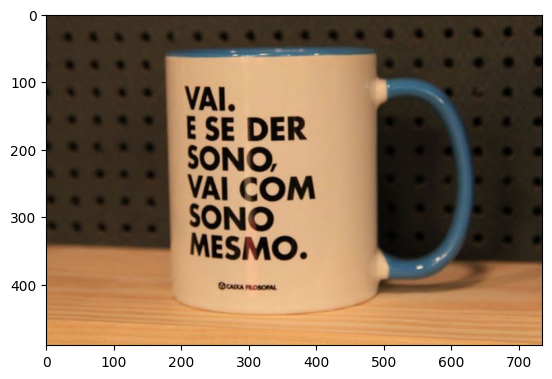

In [17]:
caneca_img = cv2.imread('text-recognize/Imagens/Aula4-caneca2.jpg')
rgb_caneca_img = cv2.cvtColor(caneca_img, cv2.COLOR_BGR2RGB)
gray_caneca_img = cv2.cvtColor(caneca_img, cv2.COLOR_BGR2GRAY)
plt.imshow(rgb_caneca_img)

In [18]:
config_tesseract = '--tessdata-dir text-recognize/tesseract/tessdata --psm 6'

caneca_data = pytesseract.image_to_data(gray_caneca_img, lang='por', config=config_tesseract, output_type=pytesseract.Output().DICT)

VAI.
E
SE
DER
SONO,
VAI
COM
SONO
MESMO.


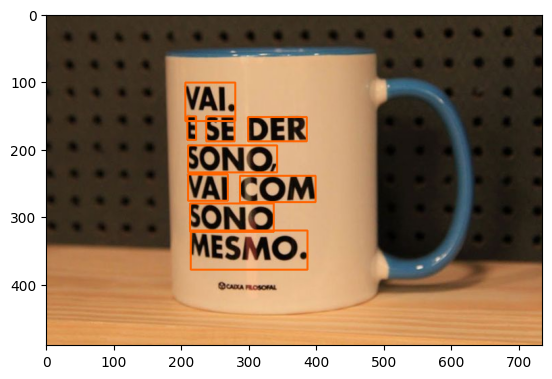

In [21]:
img_copia = rgb_caneca_img.copy()
min_conf = 70

for i in range(len(caneca_data['text'])):
  confianca = float(caneca_data['conf'][i])
  if confianca > min_conf:
    print(caneca_data['text'][i])
    x, y, img = caixa_texto(i, caneca_data, img_copia, show_txt=False)

plt.imshow(img_copia)